## Prediksi Check-in Pada Reservasi Hotel Secara Online
Maraknya sistem berbasis online juga merujuk pada hotel, sehingga saat ini banyak hotel yang ikut menerapkan hal tersebut untuk melakukan reservasi secara online. Akan tetapi, tidak semua pelanggan melakukan check-in pada hari-h sesuai yang direservasikan. Hal ini tentunya akan menyumbat keuntungan hotel, jika pada saat yang sama, pelanggan yang melakukan reservasi sudah penuh, namun terdapat pelanggan baru yang hendak check-in. Oleh karenanya, dibutuhkan sebuah model klasifikasi yang dapat memprediksi pelanggan mana yang kemungkinan akan melakukan check-in atau tidak. Setidaknya dengan hal ini, hotel dapat memilah dan melakukan berbagai keputusan yang lebih menguntungkan hotel.

Pada projek kali ini, saya menggunakan data yang diambil dari kaggle dengan link : https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset. Fokus utama dari pengerjaan projek ini adalah sebagai pembelajaran dan pembuatan projek. Pada projek ini akan digunakan sistem pengembangan yang berbasis data-sentris. Data-sentris merupakan sistem pengembangan yang melakukan improvisasi pada data untuk meningkatkan akurasi model. Model yang digunakan akan fix menggunakan algoritma Random Forest Regressor (setidaknya untuk sampai saat ini).

Ini adalah projek pertama yang saya kerjakan secara mandiri, dengan harapan untuk diteruskan dan terus melakukan perkembangan. Stay tuned

### Persiapan Awal
DIbutuhkan persiapan awal seperti import berbagai library/modul yang dibutuhkan dan penyiapan dataset.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
path = os.getcwd()
dataset_name = 'Hotel Reservations.csv'
datapath = os.path.join(path, 'data', dataset_name)

In [5]:
dataset = pd.read_csv(datapath)
dataset.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Labeling data dan Drop Kolom
Labeling data perlu dilakukan, selain untuk merapikan dataset. Hal ini juga perlu dilakukan untuk mengubah nilai pada dataset menjadi integer agar model dapat mempelajari data tersebut dengan baik.

Selain itu, kita juga perlu menghapus beberapa kolom yang dikira kurang berguna seperti kolom Booling_ID yang tidak dibutuhkan

In [6]:
df = dataset.copy()

In [7]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [8]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [9]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [10]:
df['booking_status'] = df['booking_status'].replace(['Canceled', 'Not_Canceled'], [1, 0])

In [11]:
df['room_type_reserved'] = df['room_type_reserved'].replace(
    ['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3'],
    [1, 4, 2, 6, 5, 7, 3]
)

In [12]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(
    ['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
    [1, 0, 2, 3]
)

In [13]:
df.drop(['Booking_ID'], axis = 1, inplace = True)

In [14]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,Online,0,0,0,94.50,0,1


### Encoding dan Scaling Dataset
Pada proses encoding, saya akan menggunakan one hot encoder. One Hot Encoder merupakan salah satu tipe encoding yang digunakan untuk melakukan encoding pada data berjenis ordinal, yaitu data yang tidak memiliki peringkat value. Scaling juga diperlukan untuk menormalisasi nilai pada dataset agar tidak terjadi timpang data, kali ini saya menggunakan min max scaler.

In [15]:
X = df.drop('booking_status', axis = 1)
y = df['booking_status']

In [16]:
ord_col = ['type_of_meal_plan', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
num_col = X.drop(ord_col, axis = 1).columns

num_pipeline = Pipeline([
    ("Min-Max scaler", MinMaxScaler())
])

cat_pipeline = Pipeline([
    ("One-Hot", OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('Categorical', cat_pipeline, ord_col),
    ('Numerical', num_pipeline, num_col)
])
    
X_prepared = full_pipeline.fit_transform(X)

### Melakukan Modelling
Pada test pertama ini, akan saya lakukan modeling tanpa mengubah banyak data (data murni) menggunakan logistic regression, random forest terlebih dahulu.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, random_state = 1, test_size = 0.2)

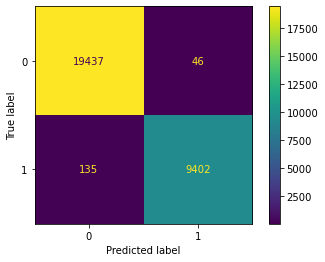

In [18]:
rfc = RandomForestClassifier()
modelrfc = rfc.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(modelrfc, X_train, y_train)

0.9051688490696072

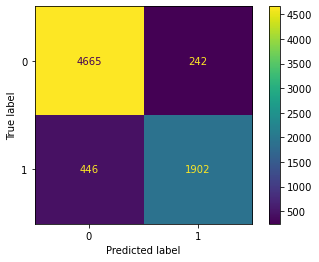

In [19]:
ConfusionMatrixDisplay.from_estimator(modelrfc, X_test, y_test)
modelrfc.score(X_test, y_test)

In [20]:
y_pred = modelrfc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
recall = tp / (tp + fp)

print('TP : {}\nTN : {}\nFN : {}\nFP : {}'.format(tp, tn, fn, fp))
print('Sensitivity : {}\nSpecificity : {}\nRecall : {}'.format(sensitivity, specificity, recall))

TP : 1902
TN : 4665
FN : 446
FP : 242
Sensitivity : 0.8100511073253833
Specificity : 0.9506826981862645
Recall : 0.8871268656716418


Tanpa sebuah perbaikan pada data (murni dari dataset pada kaggle) dengan model algoritma random forest classifier, pada sesi testing didapatkan akurasi sebesar 90%. Juga, dengan skor TP = 1903, TN = 4663, FP = 244, dan FN = 445. Hal ini menunjukkan skor akurasi yang lumayan bagus. Akan tetapi, perlu diperhatikan bahwa pada projek ini kita melatih model kita menggunakan dataset dengan label yang tidak seimbang, sehingga mungkin model juga tidak bekerja dengan baik(1). Juga, mengingat tujuan utama kita adalah membantu hotel mencari pelanggan yang memungkinkan membatalkan reservasi, maka false positive harus kita tekankan. Hal ini berguna untuk meminimalisir salahnya pengambilan keputusan dan menyebabkan kekecewaan pelanggan (2). Dengan skor specificity yang cuman 81% berarti kinerja model perlu ditingkatkan kembali (3).

Note untuk besok adalah memperbaiki projek dengan menerapkan cross validation system, juga jangan dilupakan faktor fitur / kolom sensitif yang perlu dipertimbangkan kembali.